In [ ]:
!pip install hdbscan

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
import hdbscan
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [4]:
data = np.load('clusterable_data.npy')

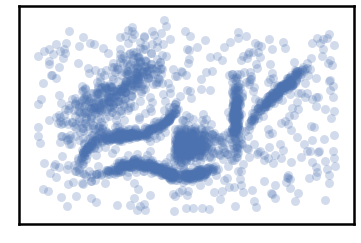

In [6]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [23]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
    return labels

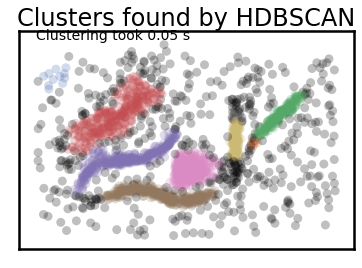

In [24]:
labels = plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':10})

In [27]:
import pandas as pd

In [29]:
df = pd.DataFrame({
    'x':data.T[0],
    'y':data.T[1],
    'cluster': labels
})

In [36]:
df

x         y  cluster
0    -0.121535 -0.228763        5
1    -0.220937 -0.252511        5
2     0.125904 -0.273143        5
3    -0.164537 -0.222244        5
4    -0.180824 -0.211075        5
...        ...       ...      ...
2304 -0.063610  0.013804        4
2305  0.284742  0.301998       -1
2306  0.502431 -0.300296       -1
2307  0.538223  0.194122       -1
2308 -0.086889 -0.209272        5

[2309 rows x 3 columns]

# Seguir
    
    Cuales son los hparams ajustables?
    Como elegirlos (como hacer el tuneo?)
    Como mido que tan bien clusteriso tweets? Que distancia?
    
    https://hdbscan.readthedocs.io/en/latest/
    
    https://hdbscan.readthedocs.io/en/latest/basic_hdbscan.html#what-about-different-metrics
    
    https://hdbscan.readthedocs.io/en/latest/parameter_selection.html
    
    por ahi conviene usar el tokenizador de las TNN que entienden bien el lenguaje y clusterizar usando una distancia euclidea?